In [5]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [109]:
#train=pd.read_csv('loantr.csv')
tests=pd.read_csv('loante.csv')

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

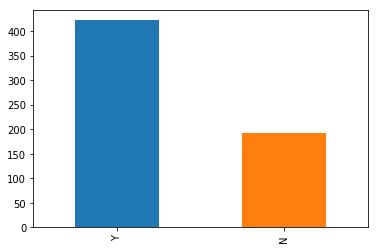

In [12]:
train.Loan_Status.value_counts().plot(kind='bar')

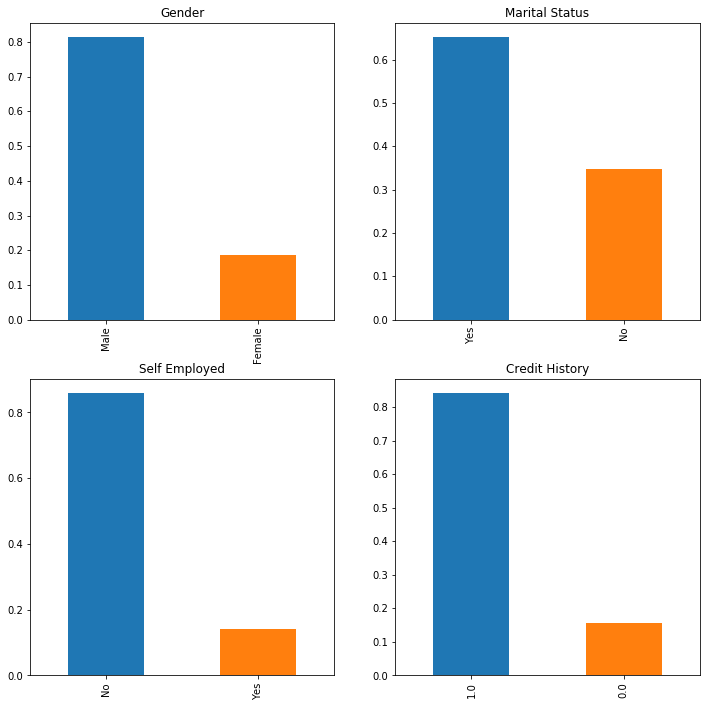

In [13]:
#Categorical Data------>(Gender, Married, Self_Employed, Credit_History, Loan_Status)
plt.figure(1)
plt.subplot(221)
train.Gender.value_counts(normalize=True).plot(kind='bar',figsize=(12,12),title='Gender')
plt.subplot(222)
train.Married.value_counts(normalize=True).plot(kind='bar',title='Marital Status')
plt.subplot(223)
train.Self_Employed.value_counts(normalize=True).plot(kind='bar',title='Self Employed')
plt.subplot(224)
train.Credit_History.value_counts(normalize=True).plot(kind='bar',title='Credit History')


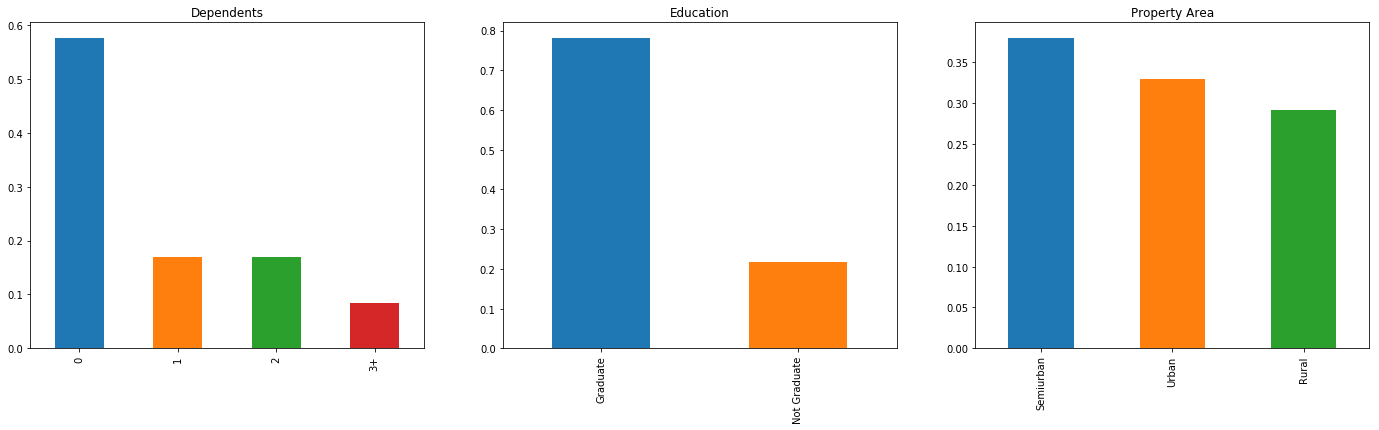

In [14]:
#Ordinal Variables---->(Dependents, Education, Property_Area)
plt.figure(2)
plt.subplot(131)
train.Dependents.value_counts(normalize=True).plot(kind='bar',figsize=(24,6),title='Dependents')
plt.subplot(132)
train.Education.value_counts(normalize=True).plot(kind='bar',title='Education')
plt.subplot(133)
train.Property_Area.value_counts(normalize=True).plot(kind='bar',title='Property Area')

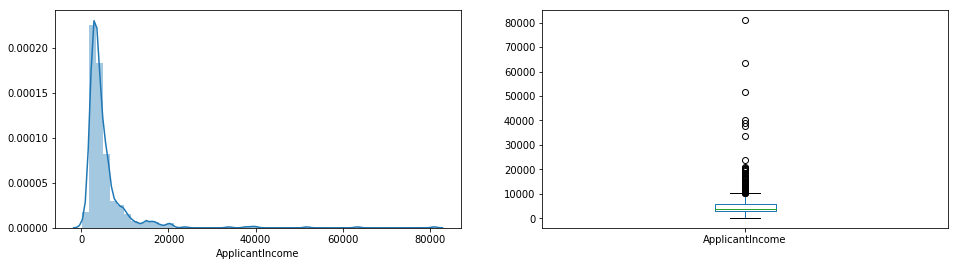

In [15]:
#INCOME
plt.figure(3)
plt.subplot(121)
#_=plt.hist(train.ApplicantIncome,bins=40)
sns.distplot(train.ApplicantIncome)
plt.subplot(122)
train.ApplicantIncome.plot(kind='box',figsize=(16,4))

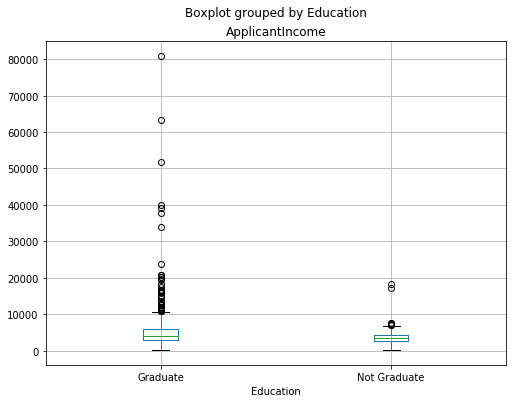

In [16]:
train.boxplot(column='ApplicantIncome',by='Education',figsize=(8,6))

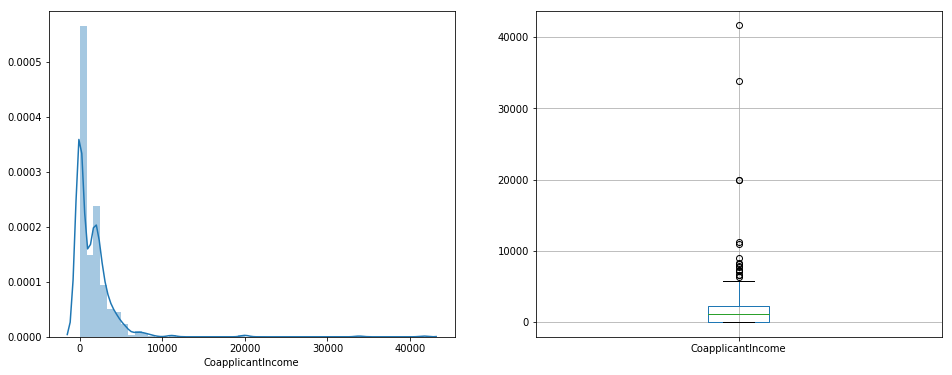

In [17]:
plt.figure(4)
plt.subplot(121)
sns.distplot(train.CoapplicantIncome)
plt.subplot(122)
train.CoapplicantIncome.plot(kind='box',figsize=(16,6),grid=True)

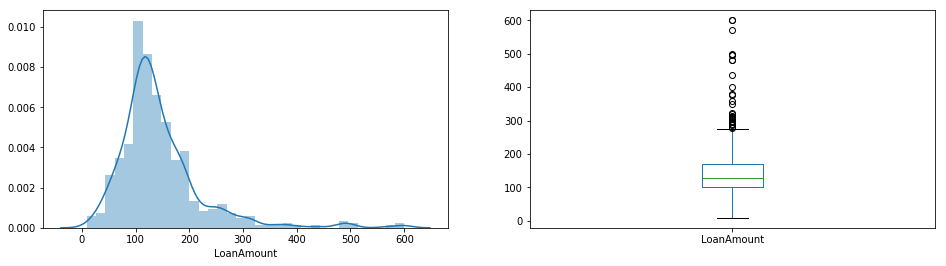

In [18]:
plt.figure(5)
plt.subplot(121)
trains=train.dropna()
sns.distplot(trains.LoanAmount)
plt.subplot(122)
trains.LoanAmount.plot(kind='box',figsize=(16,4))

In [3]:
import pandas as pd

plt.figure(6)
gen=pd.crosstab(train.Gender,train.Loan_Status)
pd.div(gen.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

mar=pd.crosstab(train.Married,train.Loan_Status)
mar.div(mar.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

dep=pd.crosstab(train.Dependents,train.Loan_Status)
dep.div(dep.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

edu=pd.crosstab(train.Education,train.Loan_Status)
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

sem=pd.crosstab(train.Self_Employed,train.Loan_Status)
sem.div(sem.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

NameError: name 'plt' is not defined

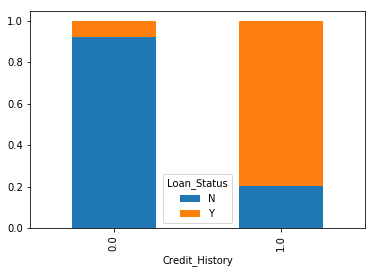

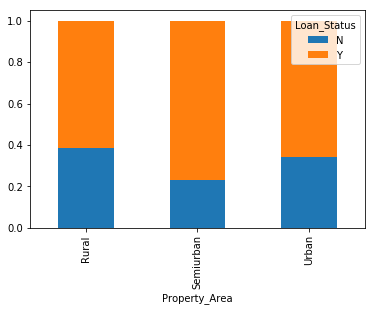

In [17]:
cdh=pd.crosstab(train.Credit_History,train.Loan_Status)
pra=pd.crosstab(train.Property_Area,train.Loan_Status)
cdh.div(cdh.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
pra.div(pra.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<bound method Axes.bar of <matplotlib.axes._subplots.AxesSubplot object at 0x7f1a568b0438>>

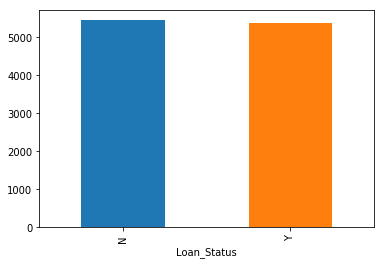

In [28]:
k=train.groupby(train.Loan_Status).ApplicantIncome.mean().plot(kind='bar')
k.bar

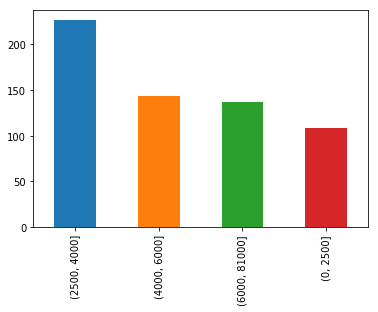

In [34]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['IncomeGroup']=pd.cut(train.ApplicantIncome,bins,group)
train.IncomeGroup.value_counts().plot(kind='bar')

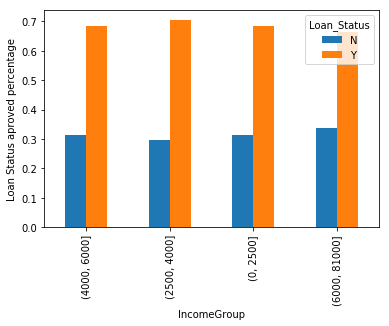

In [38]:
tig=pd.crosstab(train.IncomeGroup,train.Loan_Status)
tig.div(tig.sum(1).astype(float),axis=0).plot(kind='bar')
plt.ylabel('Loan Status aproved percentage')

In [41]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountGroup']=pd.cut(train['LoanAmount'],bins,labels=group)

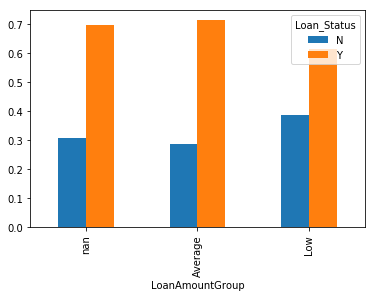

In [42]:
lam=pd.crosstab(train.LoanAmountGroup,train.Loan_Status)
lam.div(lam.sum(1).astype(float),axis=0).plot(kind='bar')

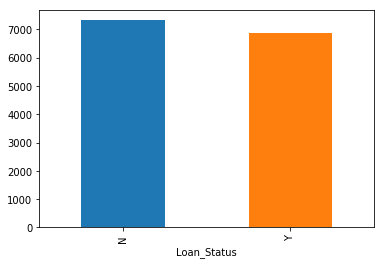

In [47]:
train['TotalIncome']=train.ApplicantIncome+train.CoapplicantIncome
train.groupby(train.Loan_Status)['TotalIncome'].mean().plot(kind='bar')

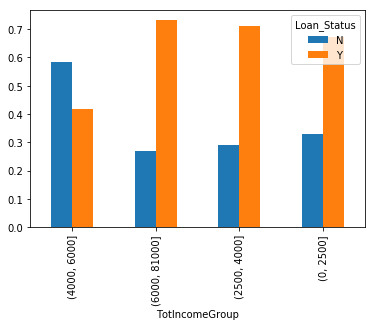

In [56]:
bins=[0,2500,4000,6000,81000]
group=['low','medium','high','veryhigh']
train['TotIncomeGroup']=pd.cut(train.TotalIncome,bins,group)
tii=pd.crosstab(train.TotIncomeGroup,train.Loan_Status)
tii.div(tii.sum(1).astype(float),axis=0).plot(kind='bar')

In [61]:
train.drop(['TotIncomeGroup','IncomeGroup','LoanAmountGroup','TotalIncome','LoanAmount_bin'],axis=1,inplace=True)

In [20]:
train.Dependents.replace('3+',3,inplace=True)
test.Dependents.replace('3+',3,inplace=True)
train.Loan_Status.replace('N',0,inplace=True)
train.Loan_Status.replace('Y',1,inplace=True)

In [84]:
test.Dependents.replace('3+',3,inplace=True)

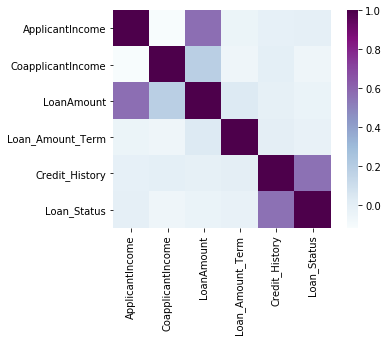

In [21]:
sns.heatmap(train.corr(),square=True,cmap='BuPu')

In [160]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [75]:
bins=[0,2500,4000,6000,81000]
trains=pd.cut((train.ApplicantIncome+train.CoapplicantIncome),bins)
ctb=pd.crosstab(trains,train.LoanAmount)

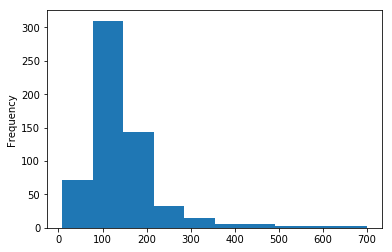

In [84]:
train.LoanAmount.sort_values().plot(kind='hist')
bins=[0,50,150,275,700]
ltrains=pd.cut(train.LoanAmount,bins)

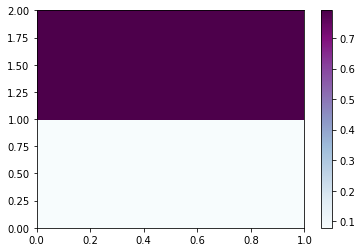

In [215]:
#ctb=pd.crosstab(trains,ltrains)
pvt=train.pivot_table('Loan_Status',index='Credit_History')
plt.pcolor(pvt,cmap='BuPu')
plt.colorbar()

In [23]:
train.LoanAmount.value_counts().sort_values(ascending=False)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
112.0     8
115.0     8
70.0      8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
116.0     6
180.0     6
155.0     6
144.0     6
175.0     6
90.0      6
158.0     6
138.0     6
81.0      6
80.0      6
71.0      5
         ..
242.0     1
211.0     1
253.0     1
350.0     1
17.0      1
145.0     1
239.0     1
243.0     1
370.0     1
149.0     1
230.0     1
190.0     1
218.0     1
62.0      1
360.0     1
53.0      1
65.0      1
156.0     1
296.0     1
380.0     1
236.0     1
234.0     1
286.0     1
58.0      1
496.0     1
207.0     1
153.0     1
35.0      1
320.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [25]:
nulla=train.LoanAmount.isnull()
l=nulla[nulla==True]

In [26]:
for k in l.index:
    ink=train.iloc[k].ApplicantIncome+train.iloc[k].CoapplicantIncome
    if ink>=4000 and ink<6000:
        train.at[k,'LoanAmount']=120
    elif ink>=6000 and ink<81000:
        train.at[k,'LoanAmount']=120
    elif ink>=0 and ink<2500:
        train.at[k,'LoanAmount']=187
    elif ink>=2500 and ink<4000:
        train.at[k,'LoanAmount']=120

In [158]:
bins=[0,50,150,275,700]
ltrains=pd.cut(train.LoanAmount,bins)
ctb1=pd.crosstab(ltrains,train.Loan_Amount_Term)
ctb1

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
"(50, 150]",0,0,0,0,3,3,1,0,16,0
"(150, 275]",1,1,1,3,0,28,2,7,323,11
"(275, 700]",0,1,1,1,0,9,1,4,144,3
"(0, 50]",0,0,0,0,0,4,0,2,29,1


In [27]:
train.Loan_Amount_Term.fillna(360.0,inplace=True)

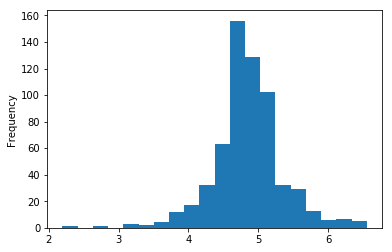

In [30]:
train.LoanAmount.plot(kind='hist',bins=20)

In [92]:
test.LoanAmount=np.log(test.LoanAmount)

In [32]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

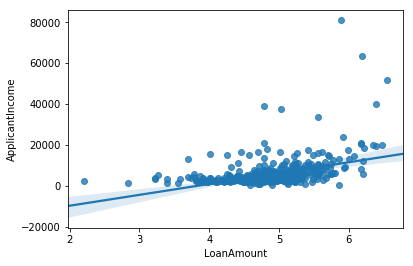

In [38]:
sns.regplot(x=train.LoanAmount,y=train.ApplicantIncome)

In [98]:
#train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [42]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [45]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
pred_cv = model.predict(x_cv)

In [51]:
accuracy_score(y_cv,pred_cv)

0.81081081081081086

In [52]:
subm=pd.read_csv('subm.csv')

In [93]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [94]:
kl=test.LoanAmount.isnull()

In [95]:
ids=kl[kl==True]

In [96]:
for k in ids.index:
    ink=test.iloc[k].ApplicantIncome+test.iloc[k].CoapplicantIncome
    if ink>=4000 and ink<6000:
        test.at[k,'LoanAmount']=np.log(120)
    elif ink>=6000 and ink<81000:
        test.at[k,'LoanAmount']=np.log(120)
    elif ink>=0 and ink<2500:
        test.at[k,'LoanAmount']=np.log(187)
    elif ink>=2500 and ink<4000:
        test.at[k,'LoanAmount']=np.log(120)

In [97]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [101]:
test=pd.get_dummies(test)
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,4.700480,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
1,3076,1500,4.836282,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
2,5000,1800,5.337538,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
3,2340,2546,4.605170,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,3276,0,4.356709,360.0,1.0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
5,2165,3422,5.023881,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
6,2226,0,4.077537,360.0,1.0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
7,3881,0,4.990433,360.0,0.0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
8,13633,0,5.634790,240.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
9,2400,2400,4.812184,360.0,1.0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0


In [106]:
pred= model.predict(test)

In [107]:
subm['Loan_Status']=pred

In [110]:
subm['Loan_ID']=tests.Loan_ID

In [112]:
subm['Loan_Status'].replace(0, 'N',inplace=True)
subm['Loan_Status'].replace(1, 'Y',inplace=True)


In [113]:
pd.DataFrame(subm, columns=['Loan_ID','Loan_Status']).to_csv('chanduanswer.csv')